In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.pipeline import Pipeline, FeatureUnion


In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI_Collection_and_Loss_Reverse_Forecast\data_preparation\EDA\Univariate_bivariate_multivariate\Univariate_Analysis\new_nasabah.csv")
df.head()

,Unnamed: 0,debtor_gender,debtor_education_level,employment_type,number_of_dependents,net_income,payment_date,loan_amount,amount_of_late,late_payment_amount,...,loss_reverse,aging,debtor_zip,debtor_rt,debtor_rw,debtor_birth_place,debtor_age,debtor_occupation,debtor_marital_status,tenor
0,0,perempuan,D3,Retired,3,15500000.0,4,6.250000e+07,2,1,...,0.000000e+00,DPK,12188,6,10,"Bengkulu, 23-09-1997",26,Pengusaha,Menikah,21
1,1,laki-laki,D3,Full-time,3,17500000.0,8,7.083333e+07,31,3,...,1.770833e+07,DPK,56126,20,20,"Jawa Tengah, 13-04-1964",59,Pengusaha,Menikah,18
2,2,laki-laki,D2,Full-time,4,17500000.0,8,5.933333e+07,0,0,...,0.000000e+00,Lancar,98101,2,15,"Jawa Tengah, 01-09-1981",42,Buruh,Cerai mati,17
3,3,laki-laki,D2,Retired,3,15500000.0,7,6.116667e+07,64,5,...,1.529167e+07,DPK,76993,19,16,"Aceh, 14-02-1987",36,Pengusaha,Menikah,17
4,4,laki-laki,SMA,Contract,5,8700000.0,9,5.616667e+07,14,2,...,0.000000e+00,DPK,6297,1,1,"Gorontalo, 06-12-1998",25,Pegawai Swasta,Cerai hidup,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5000 non-null   int64  
 1   debtor_gender           5000 non-null   object 
 2   debtor_education_level  5000 non-null   object 
 3   employment_type         5000 non-null   object 
 4   number_of_dependents    5000 non-null   int64  
 5   net_income              5000 non-null   float64
 6   payment_date            5000 non-null   int64  
 7   loan_amount             5000 non-null   float64
 8   amount_of_late          5000 non-null   int64  
 9   late_payment_amount     5000 non-null   int64  
 10  credit_risk             5000 non-null   object 
 11  credit_score            5000 non-null   int64  
 12  arrears_amounts         5000 non-null   int64  
 13  aset                    5000 non-null   int64  
 14  loss_reverse            5000 non-null   

In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")
        
df.drop(["credit_risk", "Unnamed: 0"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   debtor_gender           5000 non-null   category
 1   debtor_education_level  5000 non-null   category
 2   employment_type         5000 non-null   category
 3   number_of_dependents    5000 non-null   int64   
 4   net_income              5000 non-null   float64 
 5   payment_date            5000 non-null   int64   
 6   loan_amount             5000 non-null   float64 
 7   amount_of_late          5000 non-null   int64   
 8   late_payment_amount     5000 non-null   int64   
 9   credit_score            5000 non-null   int64   
 10  arrears_amounts         5000 non-null   int64   
 11  aset                    5000 non-null   int64   
 12  loss_reverse            5000 non-null   float64 
 13  aging                   5000 non-null   category
 14  debtor_zip              

In [5]:
columns = {}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])
             
scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,number_of_dependents,net_income,payment_date,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aset,loss_reverse,...,debtor_rw,debtor_age,tenor,debtor_gender,debtor_education_level,employment_type,aging,debtor_birth_place,debtor_occupation,debtor_marital_status
0,0.0,0.000000,-0.25,0.190476,-0.800000,-0.6,1.589041,-1.0,0.6,-0.928218,...,-0.1,-0.85,0.909091,1,2,5,0,549,3,3
1,0.0,0.266667,0.75,0.984127,-0.413333,-0.2,0.365297,0.0,1.8,0.123762,...,0.9,0.80,0.636364,0,2,1,0,1448,3,3
2,0.5,0.266667,0.75,-0.111111,-0.826667,-0.8,0.835616,-1.0,1.3,-0.928218,...,0.4,-0.05,0.545455,0,1,1,3,1392,0,2
3,0.0,0.000000,0.50,0.063492,0.026667,0.2,0.849315,0.0,0.7,-0.019802,...,0.5,-0.35,0.545455,0,1,5,0,68,3,3
4,1.0,-0.906667,1.00,-0.412698,-0.640000,-0.4,0.223744,-1.0,-0.5,-0.928218,...,-1.0,-0.90,0.363636,0,7,0,0,908,2,1


In [6]:
y = df2["loss_reverse"]
X = df2.drop("loss_reverse", axis=1)
pca = PCA()
pca.fit(X)

PCA()

In [7]:
# Tentukan jumlah principal component yang optimal
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

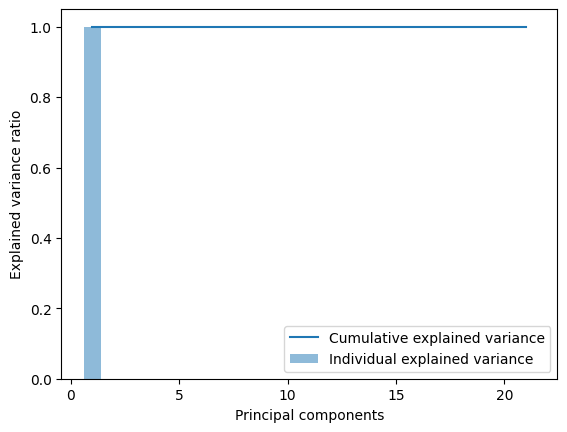

In [8]:
# Tampilkan visualisasi dari hasil PCA dengan warna yang berbeda untuk masing-masing principal component
plt.bar(range(1, len(cum_var_exp)+1), var_exp, alpha=0.5, align="center", label="Individual explained variance")
plt.step(range(1, len(cum_var_exp)+1), cum_var_exp, where="mid", label="Cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc="best")
plt.show()

In [9]:
# Mengambil komponen utama yang paling penting (misalnya, dua komponen pertama)
features = np.array(X.columns)
n_top_components = 11
top_component_indices = np.argsort(np.abs(pca.components_))[:, -n_top_components:]

# Mengambil nama fitur-fitur yang paling penting
top_feature_names = [features[i] for i in top_component_indices]

print("Fitur-fitur yang paling penting:")
for i, feature_set in enumerate(top_feature_names):
    print(f"Komponen Utama {i + 1}: {', '.join(feature_set)}")

Fitur-fitur yang paling penting:
Komponen Utama 1: debtor_age, tenor, number_of_dependents, net_income, credit_score, debtor_marital_status, aset, employment_type, loan_amount, debtor_occupation, debtor_birth_place
Komponen Utama 2: amount_of_late, number_of_dependents, arrears_amounts, aging, employment_type, debtor_occupation, credit_score, tenor, net_income, debtor_education_level, loan_amount
Komponen Utama 3: arrears_amounts, late_payment_amount, amount_of_late, aging, credit_score, net_income, tenor, number_of_dependents, loan_amount, debtor_education_level, employment_type
Komponen Utama 4: aset, late_payment_amount, debtor_rw, tenor, amount_of_late, net_income, arrears_amounts, debtor_occupation, loan_amount, employment_type, debtor_education_level
Komponen Utama 5: loan_amount, number_of_dependents, aset, debtor_marital_status, tenor, credit_score, late_payment_amount, amount_of_late, aging, arrears_amounts, debtor_occupation
Komponen Utama 6: net_income, loan_amount, employme

In [10]:
# Temukan jumlah komponen utama yang menjelaskan sebagian besar varians
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.98) + 1
print(f'Jumlah komponen utama yang menjelaskan 98% varians: {n_components}')

Jumlah komponen utama yang menjelaskan 98% varians: 1


In [11]:
features = np.array(X.columns)
select = SelectKBest(score_func=f_regression, k=11)
z = select.fit_transform(X, y) 

In [12]:
filterr = select.get_support()
features[filterr]

array(['number_of_dependents', 'net_income', 'loan_amount',
       'amount_of_late', 'late_payment_amount', 'credit_score',
       'arrears_amounts', 'tenor', 'debtor_education_level',
       'employment_type', 'aging'], dtype=object)

In [13]:
num_features_to_select = 11
# Buat instance PCA
pca = PCA(n_components=num_features_to_select)

# Buat instance SelectKBest dengan uji statistik f_classif (sesuaikan dengan tipe data dan masalah Anda)
select_k_best = SelectKBest(score_func=f_classif, k=num_features_to_select)

# Gabungkan keduanya dalam pipeline
combined_features = FeatureUnion([("pca", pca), ("select_k_best", select_k_best)])

# Buat model akhir (misalnya, classifier) setelah pemilihan fitur
# Di sini, kita tidak menambahkan classifier karena fokus pada pemilihan fitur
# Anda dapat menambahkan classifier sesuai kebutuhan

# Buat pipeline yang menggabungkan seleksi fitur dan model akhir
pipeline = Pipeline([("features", combined_features)])

X_new = pipeline.fit_transform(X, y)



In [14]:
# Setelah Anda memiliki pipeline yang sudah di-fit dan transform (seperti di atas)
# Dapatkan indeks fitur-fitur terbaik dari objek SelectKBest
feature_indices = select_k_best.get_support(indices=True)

# Ambil nama fitur dari dataset asli (misalnya, iris dataset)
selected_feature_names = [features[i] for i in feature_indices]

# Cetak nama-nama fitur yang dipilih
print("Fitur yang dipilih:")
for i, j in enumerate(selected_feature_names):
    print(i+1, j)

Fitur yang dipilih:
1 number_of_dependents
2 net_income
3 loan_amount
4 amount_of_late
5 late_payment_amount
6 credit_score
7 arrears_amounts
8 aset
9 tenor
10 debtor_education_level
11 aging


In [15]:
for i in columns:
    df2[i] = columns[i].inverse_transform(df[i])

df2[[i for i in df.columns if i not in columns]] = scaler.inverse_transform(df2[[i for i in df.columns if i not in columns]])             

df2.head(5)

,number_of_dependents,net_income,payment_date,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aset,loss_reverse,...,debtor_rw,debtor_age,tenor,debtor_gender,debtor_education_level,employment_type,aging,debtor_birth_place,debtor_occupation,debtor_marital_status
0,3.0,15500000.0,4.0,6.250000e+07,2.0,1.0,670.0,0.0,11000000.0,0.000000e+00,...,10.0,26.0,21.0,perempuan,D3,Retired,DPK,"Bengkulu, 23-09-1997",Pengusaha,Menikah
1,3.0,17500000.0,8.0,7.083333e+07,31.0,3.0,402.0,1.0,17000000.0,1.770833e+07,...,20.0,59.0,18.0,laki-laki,D3,Full-time,DPK,"Jawa Tengah, 13-04-1964",Pengusaha,Menikah
2,4.0,17500000.0,8.0,5.933333e+07,0.0,0.0,505.0,0.0,14500000.0,0.000000e+00,...,15.0,42.0,17.0,laki-laki,D2,Full-time,Lancar,"Jawa Tengah, 01-09-1981",Buruh,Cerai mati
3,3.0,15500000.0,7.0,6.116667e+07,64.0,5.0,508.0,1.0,11500000.0,1.529167e+07,...,16.0,36.0,17.0,laki-laki,D2,Retired,DPK,"Aceh, 14-02-1987",Pengusaha,Menikah
4,5.0,8700000.0,9.0,5.616667e+07,14.0,2.0,371.0,0.0,5500000.0,0.000000e+00,...,1.0,25.0,15.0,laki-laki,SMA,Contract,DPK,"Gorontalo, 06-12-1998",Pegawai Swasta,Cerai hidup


In [16]:
df_new = df2[selected_feature_names]
df_new["loss_reverse"] = df2["loss_reverse"]
df_new.head()

C:\Users\DHONI HANIF\AppData\Local\Temp\ipykernel_9128\2143404179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["loss_reverse"] = df2["loss_reverse"]


,number_of_dependents,net_income,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aset,tenor,debtor_education_level,aging,loss_reverse
0,3.0,15500000.0,6.250000e+07,2.0,1.0,670.0,0.0,11000000.0,21.0,D3,DPK,0.000000e+00
1,3.0,17500000.0,7.083333e+07,31.0,3.0,402.0,1.0,17000000.0,18.0,D3,DPK,1.770833e+07
2,4.0,17500000.0,5.933333e+07,0.0,0.0,505.0,0.0,14500000.0,17.0,D2,Lancar,0.000000e+00
3,3.0,15500000.0,6.116667e+07,64.0,5.0,508.0,1.0,11500000.0,17.0,D2,DPK,1.529167e+07
4,5.0,8700000.0,5.616667e+07,14.0,2.0,371.0,0.0,5500000.0,15.0,SMA,DPK,0.000000e+00


In [17]:
df_new.to_csv("./data_baru/new_data.csv")